In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Loading the dataset

In [3]:
df = pd.read_csv('customer_churn.csv')
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
for c in df:
    print(f"{c} : {df[c].unique()}")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [7]:
df = df.drop('customerID', axis=1)
df.shape

(7043, 20)

In [8]:
process_df = df[df.TotalCharges.values == " "]

In [9]:
process_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
def to_float(x):
    try:
        return float(x)
    except Exception as e:
        return np.NaN

In [11]:
df.TotalCharges = df.TotalCharges.apply(to_float)

In [12]:
df.TotalCharges.dtype

dtype('float64')

In [13]:
df.TotalCharges.fillna(df.TotalCharges.median(), inplace=True)

C:\Users\Nikhil Vishwakarma\AppData\Local\Temp\ipykernel_21916\708219552.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TotalCharges.fillna(df.TotalCharges.median(), inplace=True)


In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
for c in df.select_dtypes(include='object'):
    print(f"{c} : {df[c].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
df.replace(['No internet service','No phone service'],'No', inplace=True)

for c in df.select_dtypes(include='object'):
    print(f"{c} : {df[c].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
col_yes_no = [
                "Partner",
                "Dependents",
                "PhoneService",
                "MultipleLines",
                "OnlineSecurity",
                "OnlineBackup",
                "DeviceProtection",
                "TechSupport",
                "StreamingTV",
                "StreamingMovies",
                "PaperlessBilling",
                "Churn"
             ]

In [18]:
for c in df.select_dtypes(include='object'):
    df[c].replace({'No':0, 'Yes':1}, inplace=True)
    print(f"{c} : {df[c].unique()}")

gender : ['Female' 'Male']
Partner : [1 0]
Dependents : [0 1]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : [0 1]


C:\Users\Nikhil Vishwakarma\AppData\Local\Temp\ipykernel_21916\3817282690.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].replace({'No':0, 'Yes':1}, inplace=True)
C:\Users\Nikhil Vishwakarma\AppData\Local\Temp\ipykernel_21916\3817282690.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

In [19]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [20]:
df.gender.replace({'Male':0, 'Female':1}, inplace=True)

C:\Users\Nikhil Vishwakarma\AppData\Local\Temp\ipykernel_21916\3657382074.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.gender.replace({'Male':0, 'Female':1}, inplace=True)


In [21]:
df1 = pd.get_dummies(data=df, columns=['PaymentMethod', 'Contract', 'InternetService'], drop_first=True, dtype='int8')
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,1,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,1,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,1,0,0,1,0
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,0,1,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,1,0,1,0
7039,1,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,0,1,0,0,1
7040,1,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,1,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,0,0,1,0,0,0,1


In [22]:
Tenure_churn_yes = df1[df1.Churn.values==1].tenure
Tenure_churn_no = df1[df1.Churn.values==0].tenure

In [23]:
Tenure_churn_yes.shape, Tenure_churn_no.shape

((1869,), (5174,))

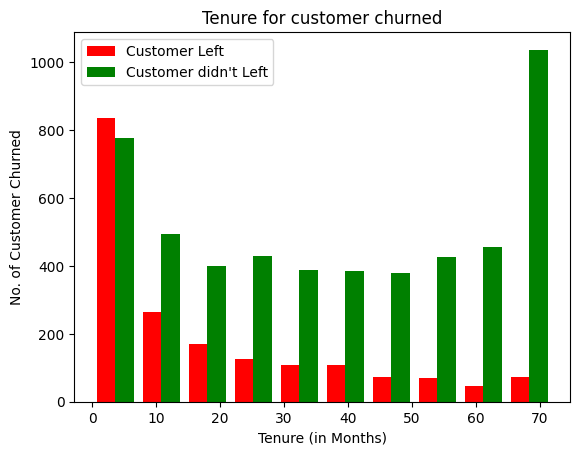

In [24]:
plt.hist([Tenure_churn_yes, Tenure_churn_no], color=['red', 'green'])
plt.title("Tenure for customer churned")
plt.xlabel('Tenure (in Months)')
plt.ylabel('No. of Customer Churned')
plt.legend(["Customer Left", "Customer didn't Left"])
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [26]:
col_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [27]:
for c in df1:
    print(f"{c} : {df1[c].unique()}")

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tec

In [28]:
from sklearn.model_selection import train_test_split

X = df1.drop('Churn', axis=1)
y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 23), (1409, 23), (5634,), (1409,))

In [29]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(23,), activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = "binary_crossentropy",
              metrics = ['accuracy']
             )

history = model.fit(X_train, y_train, epochs=100)

C:\Users\Nikhil Vishwakarma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3344 - loss: 0.9272
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6414 - loss: 0.6330
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7216 - loss: 0.5718
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7346 - loss: 0.5357
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7583 - loss: 0.5035
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7579 - loss: 0.4998
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7667 - loss: 0.4837
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 0.4660
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.4548
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7850 - loss: 0.4609
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7823 - loss: 0.4480
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━━━

In [30]:
model.evaluate(X_train, y_train)

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8002 - loss: 0.4175


[0.42088401317596436, 0.7999644875526428]

In [31]:
model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8222 - loss: 0.4010


[0.4008544385433197, 0.8190205693244934]

In [32]:
y_pred = model.predict(X_test)
y_pred[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.60121924],
       [0.129072  ],
       [0.0109208 ],
       [0.6141709 ],
       [0.01040805]], dtype=float32)

In [33]:
predictions = [(0 if i < 0.5 else 1) for i in y_pred]

In [34]:
predictions[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

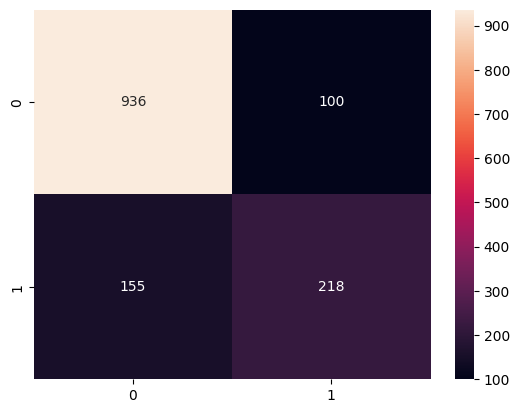

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [37]:
print(f"Recall : 0 : {round(942/(1036), 2)}")
print(f"Recall : 1 : {round(214/(373), 2)}")

Recall : 0 : 0.91
Recall : 1 : 0.57


In [38]:
print(f"Precision : 0 : {round(942/(942+159), 2)}")
print(f"Precision : 1 : {round(214/(214+94), 2)}")

Precision : 0 : 0.86
Precision : 1 : 0.69


### Vanishing Gradient Descent is solved by following methods

##### -> Kernel Reinitialization
##### -> Batch Normalization
##### -> using different activation function

### Re-Initializing kernel

In [40]:
model_churn3 = keras.Sequential([
    keras.layers.Dense(1000,input_shape=(23,), activation="relu" , kernel_initializer= tf.initializers.GlorotNormal()),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000 , activation="relu"),
    keras.layers.Dense(1000 , activation="elu"),
    keras.layers.Dense(1 , activation="sigmoid")
])

model_churn3.compile(
    optimizer="adam",
    loss = "binary_crossentropy",
    metrics=["accuracy"]
)
model_churn3.fit(X_train,y_train,epochs=20)

Epoch 1/20


C:\Users\Nikhil Vishwakarma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7604 - loss: 0.4845
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8000 - loss: 0.4319
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8154 - loss: 0.4135
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8094 - loss: 0.4135
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8079 - loss: 0.4319
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8207 - loss: 0.3997
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7992 - loss: 0.4104
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8242 - loss: 0.3847
Epoch 9/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8144 - loss: 0.3909
Epoch 10/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8287 - loss: 0.3676
Epoch 11/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8239 - loss: 0.3620
Epoch 12/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/ste

In [95]:
model_churn3.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7861 - loss: 0.6155


[0.6248064041137695, 0.7771469354629517]

### Batch Normalization

In [87]:
model_churn_batch = keras.Sequential([
    keras.layers.Dense(1000,input_shape=(23,), activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.Dense(1000),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),


    keras.layers.Dense(1 , activation="sigmoid")
])

model_churn_batch.compile(
    optimizer="adam",
    loss = "binary_crossentropy",
    metrics=["accuracy"]
)
model_churn_batch.fit(X_train,y_train,epochs=20)

C:\Users\Nikhil Vishwakarma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7182 - loss: 0.6626
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8072 - loss: 0.4169
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8120 - loss: 0.4009
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8134 - loss: 0.3889
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8152 - loss: 0.3913
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8324 - loss: 0.3763
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8287 - loss: 0.3629
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8258 - loss: 0.3691
Epoch 9/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8477 - loss: 0.3390
Epoch 10/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8490 - loss: 0.3319
Epoch 11/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8174 - loss: 0.3769
Epoch 12/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 

In [93]:
model_churn_batch.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7829 - loss: 0.5873


[0.5947946906089783, 0.7728886008262634]

### Dropout Layer

In [82]:
model_churn_dropout = keras.Sequential([
    keras.layers.Dense(1000,input_shape=(23,), activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1000 , activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1000 , activation="elu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1 , activation="sigmoid")
])

model_churn_dropout.compile(
    optimizer="adam",
    loss = "binary_crossentropy",
    metrics=["accuracy"]
)
model_churn_dropout.fit(X_train,y_train,epochs=20)

Epoch 1/20


C:\Users\Nikhil Vishwakarma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.7640 - loss: 0.4876
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7914 - loss: 0.4362
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.7983 - loss: 0.4318
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8037 - loss: 0.4274
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8064 - loss: 0.4170
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8038 - loss: 0.4123
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8078 - loss: 0.4089
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8094 - loss: 0.4091
Epoch 9/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8129 - loss: 0.3962
Epoch 10/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8156 - loss: 0.3939
Epoch 11/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8116 - loss: 0.3906
Epoch 12/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/ste

In [97]:
model_churn_dropout.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8124 - loss: 0.4402


[0.4454006552696228, 0.8076649904251099]

#### Dropout with Batch Normalization

In [100]:
model_churn = keras.Sequential([
    keras.layers.Dense(1000,input_shape=(23,), activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.Dense(1000),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),


    keras.layers.Dense(1 , activation="sigmoid")
])

model_churn.compile(
    optimizer="adam",
    loss = "binary_crossentropy",
    metrics=["accuracy"]
)
model_churn.fit(X_train,y_train,epochs=20)

C:\Users\Nikhil Vishwakarma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7368 - loss: 0.5945
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7739 - loss: 0.4497
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7908 - loss: 0.4358
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8009 - loss: 0.4189
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8042 - loss: 0.4207
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8051 - loss: 0.4077
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8134 - loss: 0.3946
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8107 - loss: 0.3969
Epoch 9/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8134 - loss: 0.4047
Epoch 10/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8182 - loss: 0.3940
Epoch 11/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8134 - loss: 0.3943
Epoch 12/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 

In [101]:
model_churn.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4555


[0.47112444043159485, 0.7913413643836975]

### Gradient Exploding is solved by Gradient Clipping

### Optimizer